import pandas for data analysis,
import seaborn for heat map plot,
import matplotlib for plotting

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
from matplotlib import dates as pm
yy.use("ggplot")

read the file and show last five rows

In [128]:
data=pd.read_csv("weather.csv")
data.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
10273,31-Dec-2020,19:00,12,6.0,↑,77,1018,6.0,NaN
10274,31-Dec-2020,20:00,11,0.0,↑,77,1018,6.0,NaN
10275,31-Dec-2020,21:00,11,0.0,↑,77,1019,6.0,NaN
10276,31-Dec-2020,22:00,10,6.0,↑,82,1019,6.0,NaN
10277,31-Dec-2020,23:00,9,0.0,↑,87,1019,6.0,NaN


show a quick describtion of the data

In [129]:
data.describe()

,temp,wspeed,humidity,pressure,visibility,Unnamed: 8
count,10278.000000,10267.000000,10278.000000,10278.000000,9980.000000,0.0
mean,17.312123,10.376936,58.331874,1015.751605,6.268938,NaN
std,8.883857,9.013007,24.230456,4.557514,3.222518,NaN
min,0.000000,0.000000,3.000000,1000.000000,0.000000,NaN
25%,10.000000,4.000000,38.000000,1012.000000,5.000000,NaN
50%,16.000000,9.000000,59.000000,1016.000000,6.000000,NaN
75%,24.750000,17.000000,81.000000,1019.000000,7.000000,NaN
max,42.000000,74.000000,100.000000,1030.000000,16.000000,NaN


In [130]:
data=data.drop("Unnamed: 8",axis=1)

convert date column datatype from object to datetime

In [131]:
data.date=pd.to_datetime(data.date)

remove minutes from time column

In [136]:
data.time=data.time.str.replace(r":.*",":00",regex=True)

new dataframe contains only the data for January

In [138]:
# jan=data[data.date.str.contains("Jan")]
jan=data[data.date.dt.month==1]
jan.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility
2390,2020-01-31,19:00,7,26.0,↑,61,1017,6.0
2391,2020-01-31,20:00,7,32.0,↑,71,1017,6.0
2392,2020-01-31,21:00,7,32.0,↑,61,1018,6.0
2393,2020-01-31,22:00,7,33.0,↑,61,1018,7.0
2394,2020-01-31,23:00,6,24.0,↑,66,1018,7.0


heatmap showing the temperature at all times during January

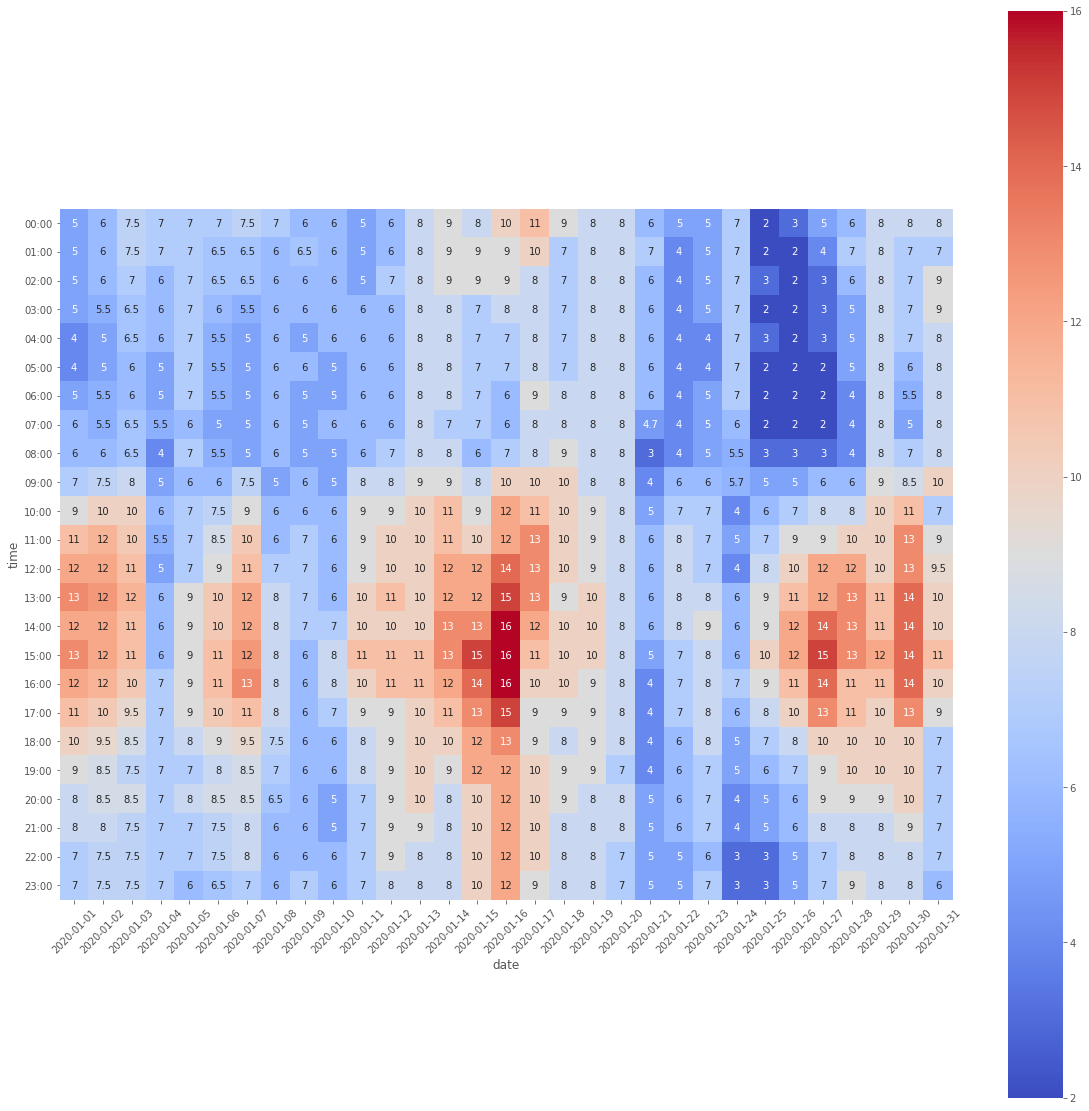

In [366]:
pivot_i=(jan.pivot_table(index="time",columns=jan.date.dt.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(20,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

histogram plot of hourly temperatures all year round and january contribution

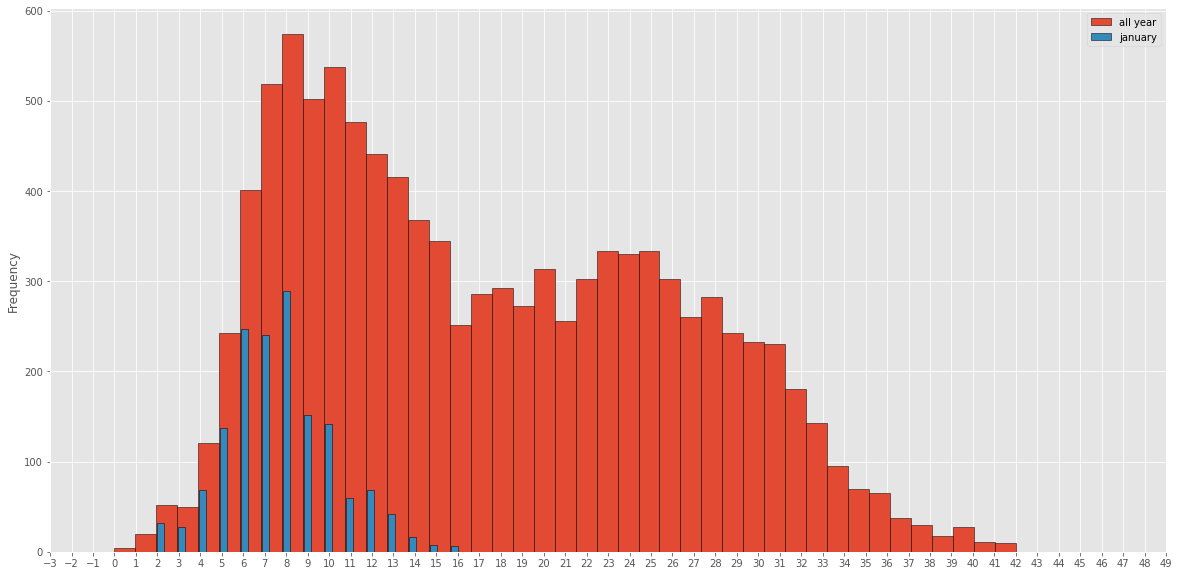

In [140]:
data.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="all year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
plt.legend()

minimum, maximum and mean temperatures for each day during January

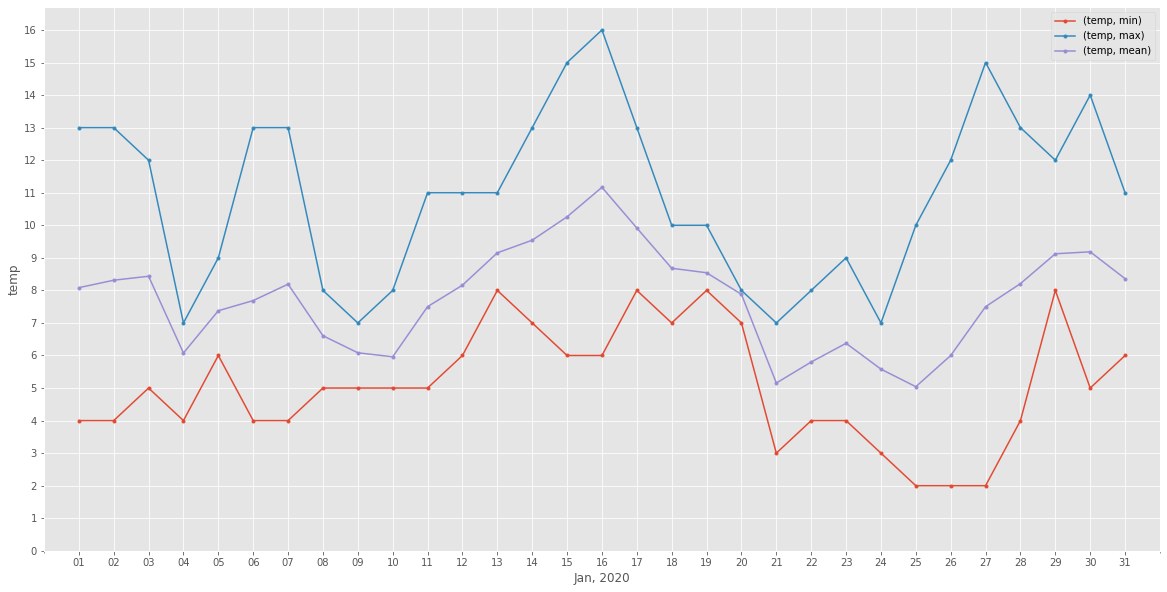

In [346]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(20,10),marker=".")
plt.xticks(pd.date_range(start=("2020-1-1"),end=("2020-1-31")))
plt.xlim([dd.datetime(2019,12,31),dd.datetime(2020,2,1)])
dataf=pm.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dataf)
plt.yticks(range(17))
plt.xlabel("Jan, 2020")
plt.ylabel("temp")
plt.legend()

## ..............................................................................................
correlation map which shows a positive relationship between (temperature, visibility),(pressure, humidity) and a negative relastionship between (temperature, humidity),(temperature, pressure)

<AxesSubplot:>

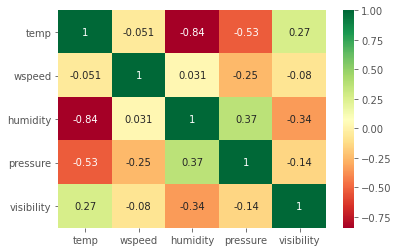

In [359]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

scale down the pressure for better visuals

In [147]:
data.pressure=data.pressure-1000

subplots for positive and negative correlations on a monthly basis. humidity and temperature have a perfect inverse relationship

<AxesSubplot:xlabel='date'>

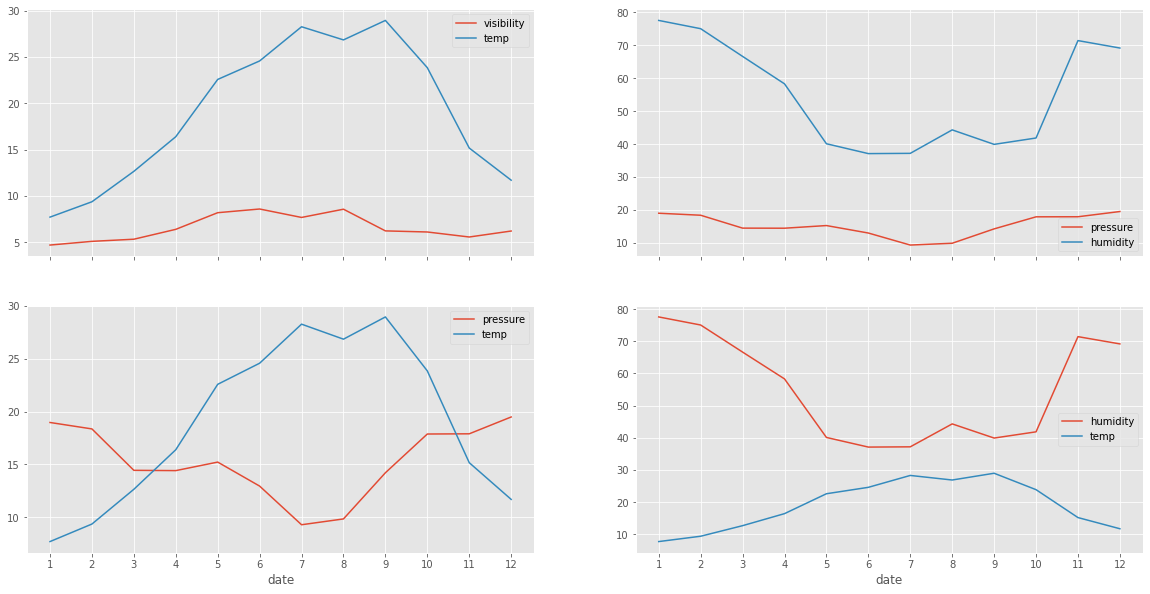

In [353]:
fig, axes= plt.subplots(2,2,sharex=True,figsize=(20,10))
plt.xticks(range(0,13))
group=data.groupby(data.date.dt.month).mean()
group[["visibility","temp"]].plot(ax=axes[0,0])
group[["pressure","humidity"]].plot(ax=axes[0,1])
group[["pressure","temp"]].plot(ax=axes[1,0])
group[["humidity","temp"]].plot(ax=axes[1,1])